### Rachana Amgai
### Assignment 2
### 12/03/2024

### Question 1
### part 1 and 2

In [1]:
# Creating two lists `a` and `b` to hold squares and cubes of integers from 0 to n, respectively.

# Function to calculate squares and cubes using standard Python
def calculate_squares_cubes(n):
    # List comprehension to generate squares
    a = [i ** 2 for i in range(n + 1)]
    # List comprehension to generate cubes
    b = [i ** 3 for i in range(n + 1)]
    return a, b

# Example: n = 3
n = 3
a, b = calculate_squares_cubes(n)

# Display the results
print(f"Squares: {a}")
print(f"Cubes: {b}")


Squares: [0, 1, 4, 9]
Cubes: [0, 1, 8, 27]


In [3]:
import numpy as np

# Function to calculate squares and cubes using NumPy
def calculate_squares_cubes_numpy(n):
    # Create a NumPy array of integers from 0 to n
    nums = np.arange(n + 1)
    # Vectorized operations for squares and cubes
    a = nums ** 2
    b = nums ** 3
    return a, b

# Example: n = 3
n = 3
a_numpy, b_numpy = calculate_squares_cubes_numpy(n)

# Display the results
print(f"Squares using NumPy: {a_numpy}")
print(f"Cubes using NumPy: {b_numpy}")


Squares using NumPy: [0 1 4 9]
Cubes using NumPy: [ 0  1  8 27]


### Queston 2

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

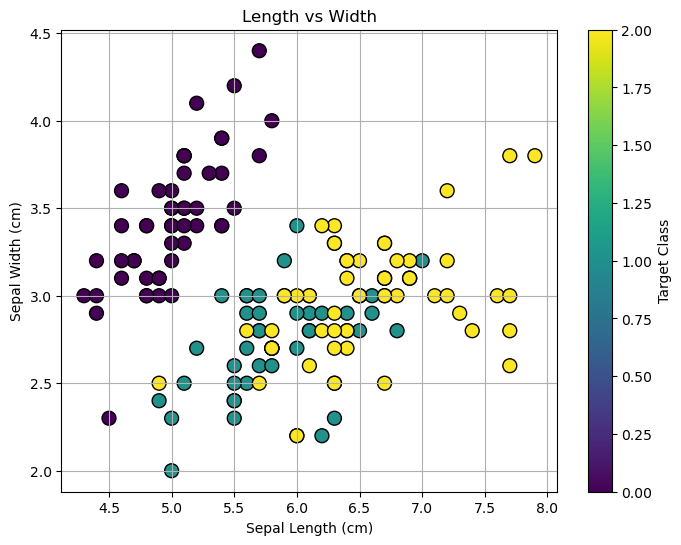

In [12]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()

# Converting the dataset into a pandas DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target_name'] = iris_df['target'].apply(lambda x: iris.target_names[x])

# Print the description of the dataset
print(iris.DESCR)

# Plot column 1 (sepal length) as x and column 2 (sepal width) as y
plt.figure(figsize=(8, 6))
plt.scatter(
    iris_df[iris.feature_names[0]],  # Sepal Length (x-axis)
    iris_df[iris.feature_names[1]],  # Sepal Width (y-axis)
    c=iris_df['target'],             # Color based on target class
    cmap='viridis',                  # Color map
    edgecolor='k',                   # Black edge color for points
    s=100                            # Size of the points
)

# Add labels, title, and grid
plt.title('Length vs Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Target Class')  
plt.grid(True)

# Show the plot
plt.show()


### Question 3


The Boston dataset contains data on housing in Boston suburbs. Each row represents a suburb.
Features include:
- CRIM: Per capita crime rate
- ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: Proportion of non-retail business acres
- CHAS: Charles River dummy variable
- NOX: Nitric oxide concentration
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built before 1940
- DIS: Distance to employment centers
- RAD: Accessibility to radial highways
- TAX: Property tax rate
- PTRATIO: Pupil-teacher ratio
- B: 1000(Bk - 0.63)^2, where Bk is the proportion of Black people by town
- LSTAT: % lower status population
- Target: Median value of owner-occupied homes



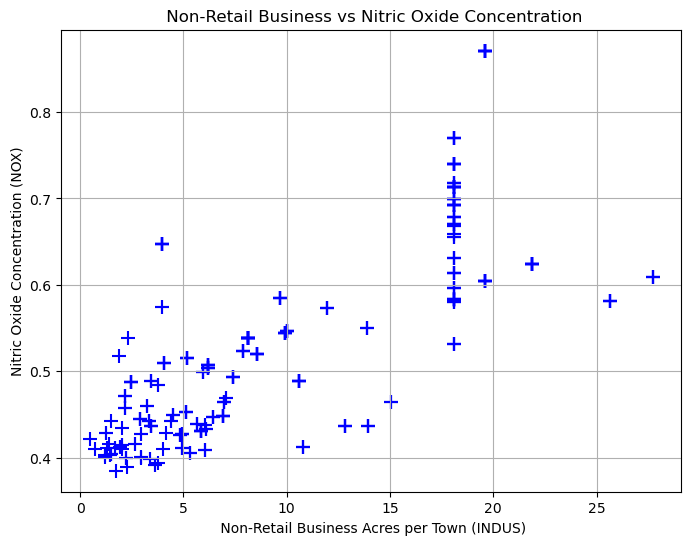

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Boston dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

# Process the dataset into a structured format
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", 
    "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
boston_df = pd.DataFrame(data, columns=columns)
boston_df['target'] = target

# Printing a brief description of the dataset
description = """
The Boston dataset contains data on housing in Boston suburbs. Each row represents a suburb.
Features include:
- CRIM: Per capita crime rate
- ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: Proportion of non-retail business acres
- CHAS: Charles River dummy variable
- NOX: Nitric oxide concentration
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built before 1940
- DIS: Distance to employment centers
- RAD: Accessibility to radial highways
- TAX: Property tax rate
- PTRATIO: Pupil-teacher ratio
- B: 1000(Bk - 0.63)^2, where Bk is the proportion of Black people by town
- LSTAT: % lower status population
- Target: Median value of owner-occupied homes
"""
print(description)

# Plot column 3 (INDUS: proportion of non-retail business) as x
# and column 5 (NOX: nitric oxide concentration) as y
plt.figure(figsize=(8, 6))
plt.scatter(
    boston_df["INDUS"],  # Proportion of non-retail business acres (x-axis)
    boston_df["NOX"],    # Nitric oxide concentration (y-axis)
    marker='+',          # Use '+' marker
    color='b',           # Blue color
    s=100                # Marker size
)

# Add labels, title, and grid
plt.title(' Non-Retail Business vs Nitric Oxide Concentration')
plt.xlabel(' Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.grid(True)

# Show the plot
plt.show()


### Question 4

In [16]:
import numpy as np

# Creating a multi-dimensional array (3x3 matrix)
multi_dim_array = np.array([
    [5, 4, 4],
    [3, 6, 7],
    [2, 9, 4]
])

# Print the array
print("Multi-Dimensional Array:")
print(multi_dim_array)

# Checking the dimensions of the array
print("\nArray Dimensions:", multi_dim_array.ndim)

# Access an element in the array (row 2, column 3)
element = multi_dim_array[1, 2]  # Indexing starts at 0
print("\nElement at row 2, column 3:", element)

# Perform basic operations on the array (e.g., scalar multiplication)
array_scaled = multi_dim_array * 2
print("\nArray after scalar multiplication:")
print(array_scaled)


Multi-Dimensional Array:
[[5 4 4]
 [3 6 7]
 [2 9 4]]

Array Dimensions: 2

Element at row 2, column 3: 7

Array after scalar multiplication:
[[10  8  8]
 [ 6 12 14]
 [ 4 18  8]]


### Question 5

In [18]:
import numpy as np

# Creating an array of single-precision floats using dtype=np.float32
single_precision_array = np.array([2.5, 4.5, 6.5, 7.5], dtype=np.float32)

# Print the array
print("Array with Single-Precision Floats:")
print(single_precision_array)

# Check the data type of the array
print("\nData Type of the Array:", single_precision_array.dtype)

# Perform operations to confirm precision (e.g., addition)
result = single_precision_array + 1.1
print("\nArray after Adding 1.1:")
print(result)


Array with Single-Precision Floats:
[2.5 4.5 6.5 7.5]

Data Type of the Array: float32

Array after Adding 1.1:
[3.6 5.6 7.6 8.6]


### Question 6

In [20]:

# mport numpy as np

# Creating an array of complex numbers
complex_array = np.array([1 + 4j, 3 + 7j, 5 + 9j, 7 + 6j])

# Print the array of complex numbers
print("Array of Complex Numbers:")
print(complex_array)

# Checking the data type of the array
print("\nData Type of the Array:", complex_array.dtype)

# Perform operations on the complex array (e.g., multiplication by a scalar)
scaled_array = complex_array * 2
print("\nArray after Multiplication by 2:")
print(scaled_array)

# Computing the conjugate of each complex number
conjugate_array = np.conjugate(complex_array)
print("\nConjugate of the Complex Array:")
print(conjugate_array)


Array of Complex Numbers:
[1.+4.j 3.+7.j 5.+9.j 7.+6.j]

Data Type of the Array: complex128

Array after Multiplication by 2:
[ 2. +8.j  6.+14.j 10.+18.j 14.+12.j]

Conjugate of the Complex Array:
[1.-4.j 3.-7.j 5.-9.j 7.-6.j]


### Question 7

In [22]:
import numpy as np

# Define an array containing numbers 0 through 8
array = np.arange(9)

# Printing the original array
print("Original Array:")
print(array)

# Select a part of the array from indexes 3 to 7 (elements 3 through 6)
part_array = array[3:7]
print("\nPart of the Array (indexes 3 to 7, elements 3 through 6):")
print(part_array)

# Choosing elements from index 0 to 7 with an increment of 2
increment_array = array[0:8:2]
print("\nElements from index 0 to 7 with increment of 2:")
print(increment_array)

# Reverse the array
reversed_array = array[::-1]
print("\nReversed Array:")
print(reversed_array)


Original Array:
[0 1 2 3 4 5 6 7 8]

Part of the Array (indexes 3 to 7, elements 3 through 6):
[3 4 5 6]

Elements from index 0 to 7 with increment of 2:
[0 2 4 6]

Reversed Array:
[8 7 6 5 4 3 2 1 0]


### Question 8

In [24]:
import numpy as np

# Create a 2D array
array = np.array([[2, 4, 6], [3, 1, 8], [7, 5, 8]])

# Print the original array
print("Original Array:")
print(array)

# Perform the ravel function (returns a flattened view of the array)
ravel_array = array.ravel()
print("\nArray after Ravel (flattened view):")
print(ravel_array)

# Perform the flatten function (returns a flattened copy of the array)
flatten_array = array.flatten()
print("\nArray after Flatten (flattened copy):")
print(flatten_array)

# Set the shape of the array using a tuple
array.shape = (1, 9)  # Reshaping into a single row
print("\nArray after Setting Shape (1 row, 9 columns):")
print(array)

# Transpose the array (swap rows and columns)
transposed_array = array.T
print("\nTransposed Array:")
print(transposed_array)

# Resize the array to a new shape
resized_array = np.resize(array, (2, 6))  # Resizing into 2 rows and 6 columns
print("\nResized Array (2 rows, 6 columns):")
print(resized_array)


Original Array:
[[2 4 6]
 [3 1 8]
 [7 5 8]]

Array after Ravel (flattened view):
[2 4 6 3 1 8 7 5 8]

Array after Flatten (flattened copy):
[2 4 6 3 1 8 7 5 8]

Array after Setting Shape (1 row, 9 columns):
[[2 4 6 3 1 8 7 5 8]]

Transposed Array:
[[2]
 [4]
 [6]
 [3]
 [1]
 [8]
 [7]
 [5]
 [8]]

Resized Array (2 rows, 6 columns):
[[2 4 6 3 1 8]
 [7 5 8 2 4 6]]


### Question 9

In [26]:
import numpy as np

# Create a 2D array
array = np.array([[7, 1, 8], [7, 4, 2], [9, 3, 2]])

# Print the original array
print("Original Array:")
print(array)

# Find the number of dimensions
num_dimensions = array.ndim
print("\nNumber of Dimensions:")
print(num_dimensions)

# Find the total number of elements in the array
num_elements = array.size
print("\nCount of Elements:")
print(num_elements)

# Find the size (in bytes) of each element in the array
element_size = array.itemsize
print("\nSize of Each Element (in bytes):")
print(element_size)

# Find the total size of the array in bytes
total_size = array.nbytes
print("\nTotal Size of Array (in bytes):")
print(total_size)


Original Array:
[[7 1 8]
 [7 4 2]
 [9 3 2]]

Number of Dimensions:
2

Count of Elements:
9

Size of Each Element (in bytes):
4

Total Size of Array (in bytes):
36


### Question 10

In [28]:
import numpy as np

# Create a NumPy array
array = np.array([[9, 4, 2], [6, 4, 7], [8, 2, 9]])

# Print the original array
print("Original NumPy Array:")
print(array)

# Convert the NumPy array to a Python list
array_as_list = array.tolist()

# Print the converted Python list
print("\nConverted Python List:")
print(array_as_list)

# Confirm the type of the converted list
print("\nType of the Converted List:")
print(type(array_as_list))


Original NumPy Array:
[[9 4 2]
 [6 4 7]
 [8 2 9]]

Converted Python List:
[[9, 4, 2], [6, 4, 7], [8, 2, 9]]

Type of the Converted List:
<class 'list'>
